# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 64.25  63.25  58.25]
   [ 60.75  59.75  54.75]
   [ 59.5   58.5   53.5 ]
   ...
   [ 68.    72.    71.  ]
   [ 62.75  66.75  65.75]
   [ 66.5   70.5   69.5 ]]

  [[ 69.5   68.5   63.5 ]
   [ 65.5   64.5   59.5 ]
   [ 63.    62.    57.  ]
   ...
   [ 70.    74.    73.  ]
   [ 63.25  67.25  66.25]
   [ 62.25  66.25  65.25]]

  [[ 65.25  64.25  59.25]
   [ 63.75  62.75  57.75]
   [ 64.25  63.25  58.25]
   ...
   [ 69.    73.    72.  ]
   [ 63.5   67.5   66.5 ]
   [ 68.75  72.75  71.75]]

  ...

  [[102.75  98.75  99.75]
   [103.25  99.25 100.25]
   [104.   100.   101.  ]
   ...
   [ 76.5   80.5   81.5 ]
   [ 81.25  85.25  86.25]
   [ 82.75  86.75  87.75]]

  [[ 92.5   88.5   89.5 ]
   [ 93.25  89.25  90.25]
   [100.5   96.5   97.5 ]
   ...
   [ 78.    82.    83.  ]
   [ 83.75  87.75  88.75]
   [ 80.25  84.25  85.25]]

  [[103.75  99.75 100.75]
   [ 99.    95.    96.  ]
   [102.    98.    99.  ]
   ...
   [ 76.75  80.75  81.75]
   [ 76.75  80.75  81.75]
   [ 78.5   82.5   8

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [26]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [27]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [34]:
cnn.add(tf.keras.layers.Flatten())

In [35]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [37]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [38]:
 import tensorflow as tf

# Compile the model using the standard Adam optimizer
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




In [39]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model training


In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3737s 2s/step - accuracy: 0.3838 - loss: 2.2174 - val_accuracy: 0.8343 - val_loss: 0.5290
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3389s 2s/step - accuracy: 0.8353 - loss: 0.5275 - val_accuracy: 0.9081 - val_loss: 0.2927
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3171s 1s/step - accuracy: 0.9042 - loss: 0.2985 - val_accuracy: 0.9397 - val_loss: 0.1892
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3195s 1s/step - accuracy: 0.9374 - loss: 0.1936 - val_accuracy: 0.9372 - val_loss: 0.1999
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3217s 1s/step - accuracy: 0.9519 - loss: 0.1465 - val_accuracy: 0.9489 - val_loss: 0.1579
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6518s 3s/step - accuracy: 0.9652 - loss: 0.1086 - val_accuracy: 0.9564 - val_loss: 0.1394
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3453s 2s/step - accuracy: 0.9717 - loss: 0.0864 - val_accuracy: 0.9266 - val_loss: 0.2442
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8502s 4s/step - accuracy: 0.9745 -

## Evaluating Model

In [35]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 928s 422ms/step - accuracy: 0.0269 - loss: 4.7364
Training accuracy: 0.026772886514663696


In [36]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 230s 417ms/step - accuracy: 0.0278 - loss: 4.7307
Validation accuracy: 0.026633279398083687


### Saving Model

In [46]:
cnn.save('trained_plant_disease_model.keras')

In [47]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5891883969306946,
  0.857628583908081,
  0.9128671884536743,
  0.939910352230072,
  0.9554449319839478,
  0.9643217921257019,
  0.9727861285209656,
  0.9752044677734375,
  0.9796286821365356,
  0.9816487431526184],
 'loss': [1.4084171056747437,
  0.45278966426849365,
  0.2701951265335083,
  0.1840069442987442,
  0.13562650978565216,
  0.11154914647340775,
  0.08474476635456085,
  0.0739203542470932,
  0.06382934749126434,
  0.05641436204314232],
 'val_accuracy': [0.8342818021774292,
  0.9080924391746521,
  0.9397336840629578,
  0.9372296929359436,
  0.9488959908485413,
  0.956407904624939,
  0.9266446828842163,
  0.9586842656135559,
  0.9567493796348572,
  0.9640905857086182],
 'val_loss': [0.5289849042892456,
  0.2926991581916809,
  0.18919794261455536,
  0.19986926019191742,
  0.1578885316848755,
  0.1394387036561966,
  0.24418239295482635,
  0.1391487717628479,
  0.1535981297492981,
  0.12318093329668045]}

In [48]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [49]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

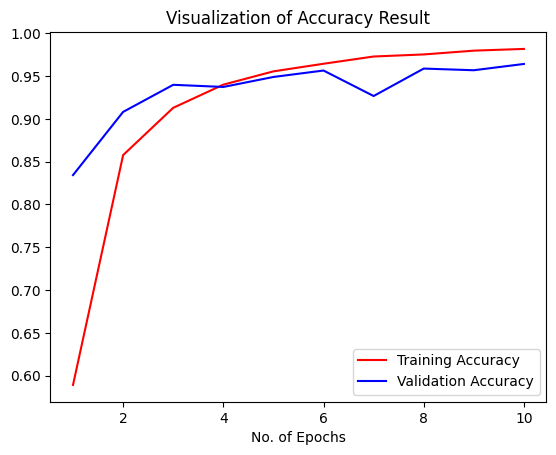

In [50]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [51]:
class_name = validation_set.class_names

In [52]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [53]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 666s 38ms/step


In [54]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [55]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [58]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.95       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       1.00      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.79      0.96      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.79      0.

### Confusion Matrix Visualization

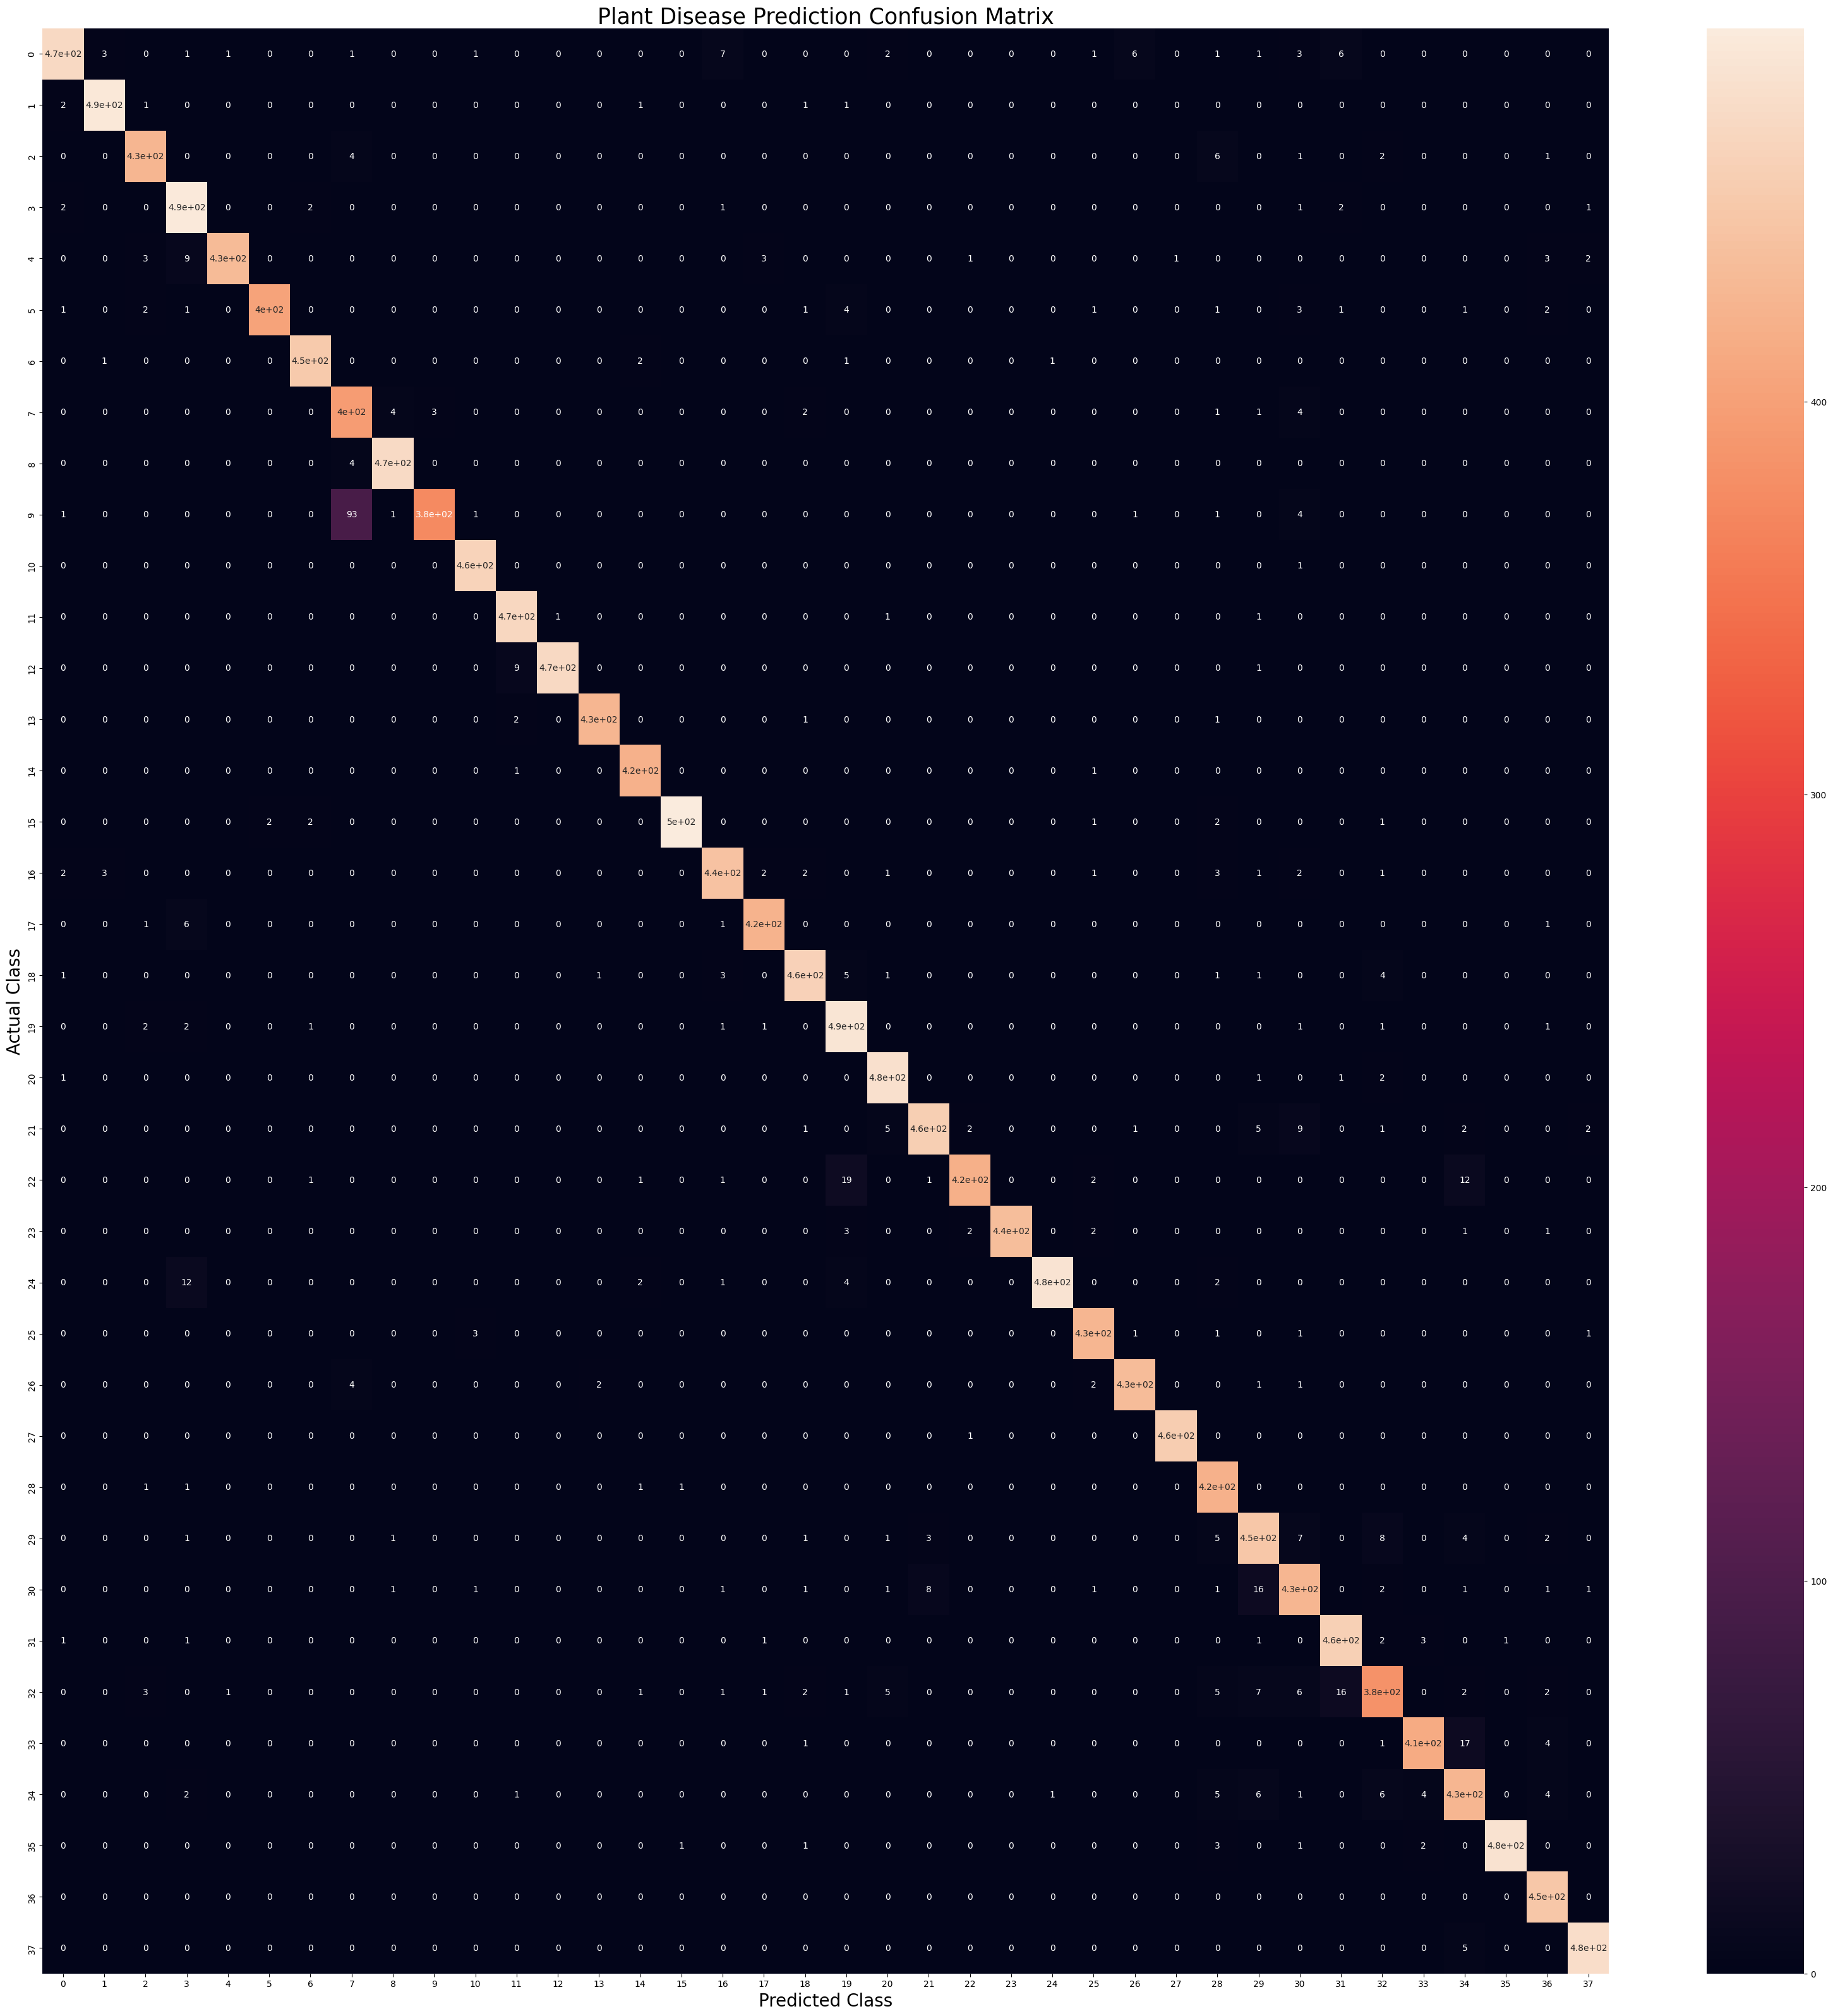

In [59]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()